/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000029389200265812.svs
((95616, 27749), (23904, 6937), (5976, 1734), (2988, 867))
0.50229999999999997
[20.0, 4.999909905039911, 1.249887373182203, 0.6249436865911016]
45
(1734, 5976)


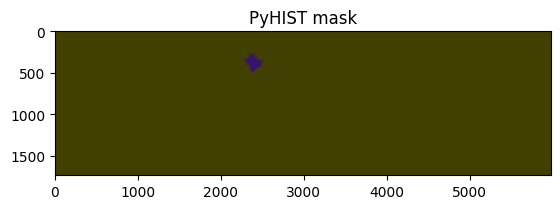

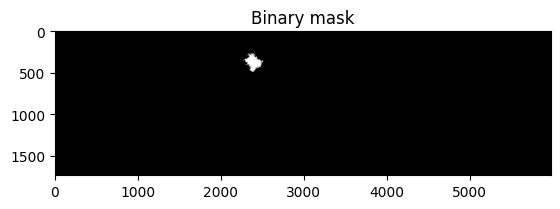

In [8]:
from pathlib import Path
import cv2 as cv
from matplotlib import pyplot as plt
import openslide
import numpy as np

thispath = Path.cwd().resolve()

maskdir = Path(thispath.parent / "PyHIST" / "output")
datadir = Path("/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC")

def available_magnifications(mpp, level_downsamples):
	mpp = float(mpp)
	if (mpp<0.26):
		magnification = 40
	else:
		magnification = 20
	
	mags = []
	for l in level_downsamples:
		mags.append(magnification/l)
	
	return mags

image_index = "000029389200265812"	

svs_files = [i for i in datadir.rglob("*.svs") if "LungAOEC" in str(i) and image_index in str(i)]

histo_mask = cv.imread(str(Path(maskdir / image_index / f"segmented_{image_index}.ppm")))
print(svs_files[0])
slide = openslide.OpenSlide(str(svs_files[0]))
print(slide.level_dimensions)
mpp = slide.properties['openslide.mpp-x']
print(mpp)

level_downsamples = slide.level_downsamples
mags = available_magnifications(mpp, level_downsamples)
print(mags)
hist_gray = cv.cvtColor(histo_mask, cv.COLOR_BGR2GRAY)
print(hist_gray[1, 1])
print(hist_gray.shape)

# Mask from PyHIST to binary mask
binary_mask = np.zeros_like(histo_mask)
for idx, pixel_value in np.ndenumerate(hist_gray):
    if (hist_gray[idx] == hist_gray[1,1]):
        binary_mask[idx] = 0
    else:
        binary_mask[idx] = 1
        
binary_mask[binary_mask == 1] = 255

plt.imshow(histo_mask)
plt.title("PyHIST mask")
plt.show()


plt.imshow(binary_mask)
plt.title("Binary mask")
plt.show()